# Lab 7.05 - Time series analysis

In [1]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 5 - Alcoholic beverages sales

The file US Retail.csv contains monthly retail sales of beer, wine, and liquor at U.S. liquor stores.

- Is seasonality present in these data?
- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


<Axes: xlabel='Month'>

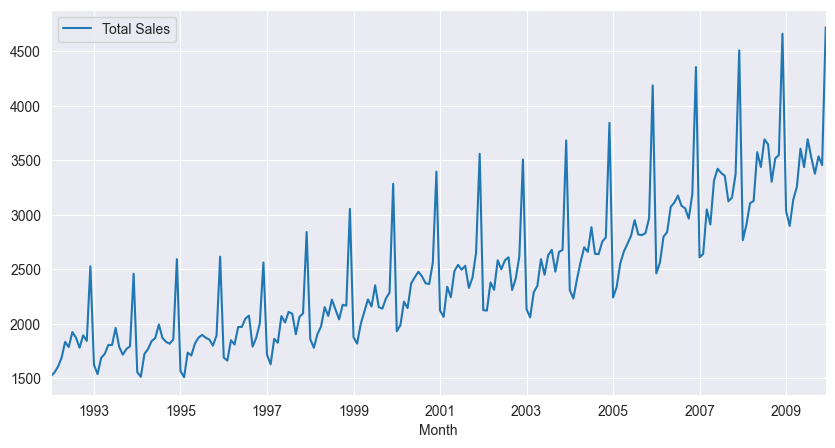

In [3]:
data.plot( y='Total Sales', figsize=[10,5])

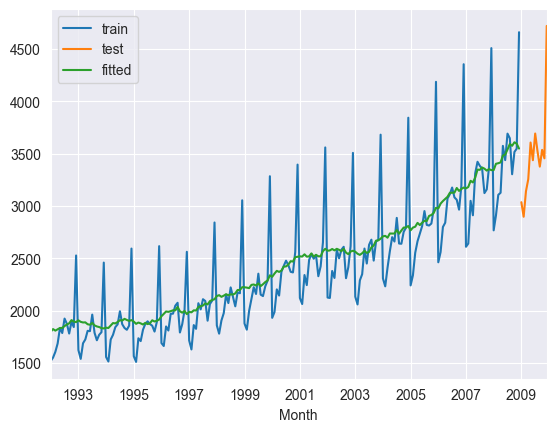

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data['Total Sales'][:-12]
test = data['Total Sales'][-12:]

alcohol_hw = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
(alcohol_hw.level + alcohol_hw.season).plot(legend=True, label='fitted')

alcohol_predicted = alcohol_hw.forecast(12)


In [16]:
data['fittedvalues'] = alcohol_hw.fittedvalues
data['predictedvalues'] = alcohol_predicted
data.tail()

,Total Sales,fittedvalues,predictedvalues
Month,,,
2009-08-01,3524,NaN,3647.009768
2009-09-01,3376,NaN,3456.767219
2009-10-01,3536,NaN,3560.381263
2009-11-01,3455,NaN,3711.494479
2009-12-01,4720,NaN,5076.135732


Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

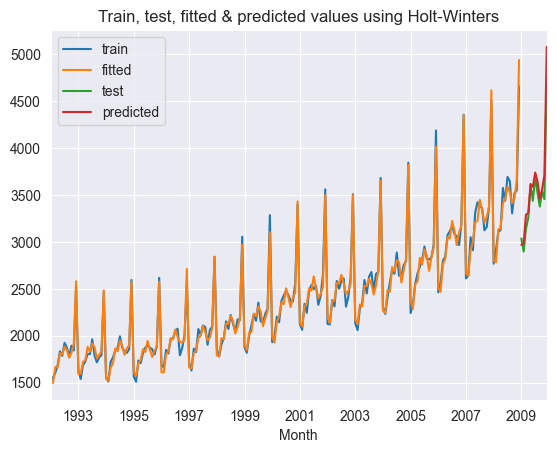

In [17]:

train.plot(legend=True, label='train')
alcohol_hw.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
alcohol_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,alcohol_predicted)}')

MAE = 163.30306599860447


## Source
Business Analytics Data Analysis & Decision Making 